In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append("..")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.available
plt.style.use('seaborn-whitegrid')
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-paper'])
    plt.rc("font", family="Times New Roman")
set_style()

pd.set_option('display.max_rows', 500)
relativePathImages = '../latex/src/images/'
train = True
filtro = False
path = '' if train else '_test'
pathFiltro = '' if filtro else '_sinFiltro' 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/daleman/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


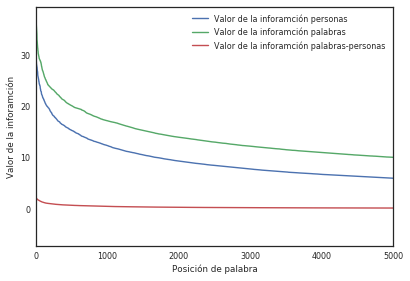

In [4]:
df = pd.read_csv('ivalue_entropia_personas_palabras{0}{1}.csv'.format(path,pathFiltro),index_col=0)
df2 = df.sort_values(by="information_value_personas", ascending=False)
df2 = df2.reset_index()
ax2 = df2.information_value_personas.plot(xlim=[0,5000])
df2 = df.sort_values(by="information_value_palabras", ascending=False)
df2 = df2.reset_index()
ax2 = df2.information_value_palabras.plot(xlim=[0,5000])

df2 = df.sort_values(by="information_value_personas_palabras", ascending=False)
df2 = df2.reset_index()
ax2 = df2.information_value_personas_palabras.plot(xlim=[0,5000])
ax2.legend([u'Valor de la inforamción personas',u'Valor de la inforamción palabras',u'Valor de la inforamción palabras-personas'])


ax2.set_xlabel(u'Posición de palabra')
ax2.set_ylabel(u'Valor de la inforamción')

ax= ax2.get_figure()
# ax.savefig("{0}ivalues.pdf".format(),dpi=300)

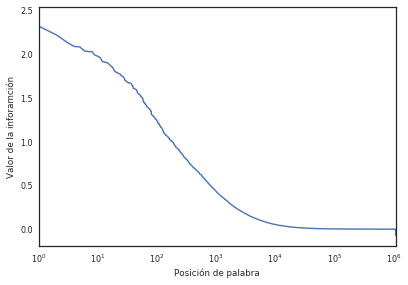

In [39]:
df2 = df.sort_values(by="information_value_personas_palabras", ascending=False)
df2 = df2.reset_index()
ax2 = df2.information_value_personas_palabras.plot(logx=True)
ax2.set_xlabel(u'Posición de palabra')
ax2.set_ylabel(u'Valor de la inforamción')
ax= ax2.get_figure()
ax.savefig("{0}ivaluesLog{1}{2}.pdf".format(relativePathImages,path,pathFiltro),dpi=300)

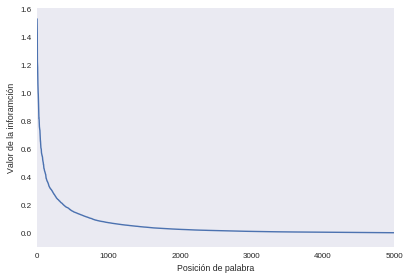

In [5]:
df2 = df.sort_values(by="information_value_personas_palabras", ascending=False)
df2 = df2.reset_index()
ax2 = df2.information_value_personas_palabras.plot(xlim=[0,5000])


ax2.set_xlabel(u'Posición de palabra')
ax2.set_ylabel(u'Valor de la inforamción')

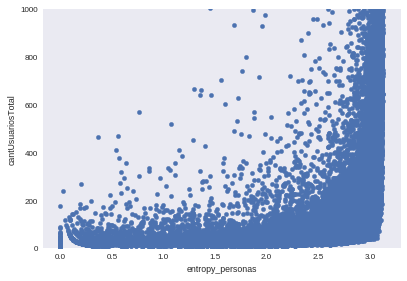

In [6]:
df.plot.scatter(x="entropy_personas", y="cantUsuariosTotal", ylim=[0, 1000])

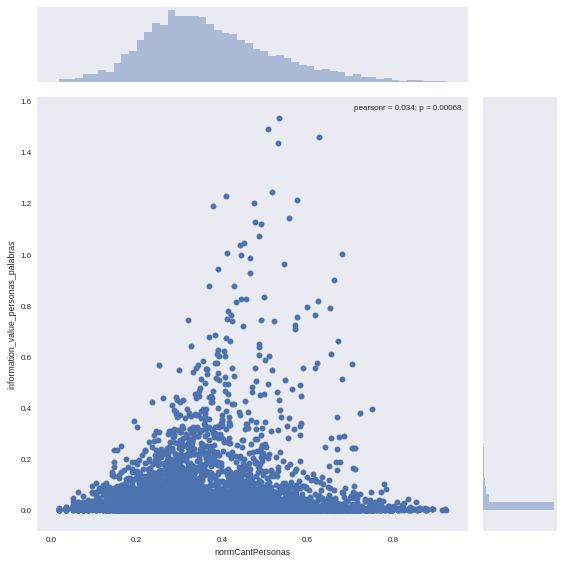

In [7]:
sns.set_style(style='dark')
sns.jointplot(kind='scatter',x="normCantPersonas", y="information_value_personas_palabras",data=df.iloc[:10000],size=8)

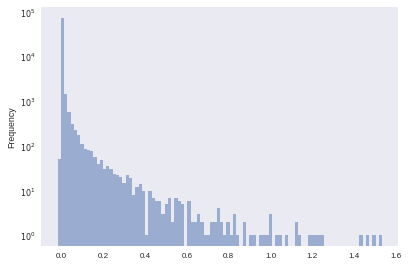

In [8]:
df.information_value_personas_palabras.plot(kind='hist',bins=100,logy=True,alpha=0.5)

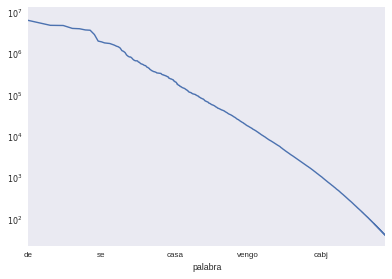

In [9]:
ax = df.cantPalabra.sort_values(ascending=False).plot(y='cantPalabra',x=range(len(df.cantPalabra)),logy=True,logx=True)
ax.set_xlabel= range(len(df.cantPalabra))


In [26]:
df.sort_values(by='cantPalabra',ascending=False,inplace=True)
df['Rank'] = df['cantPalabra'].rank(method = 'min', ascending = False)
x = range(len(df.cantPalabra))
x = np.log(df['Rank'])
y = np.log(df['cantPalabra'])
fit = np.polyfit(x, y, deg = 1)
fitted = fit[0] * x + fit[1]
print 'Valor estimado de s:\n{0}'.format(fit[0])

Valor estimado de s:
-1.83305626657


In [13]:
df.cantPalabra

que                               7457301.0
de                                5435072.0
me                                4982265.0
a                                 4675614.0
la                                4220958.0
no                                4185980.0
y                                 3543231.0
el                                3022217.0
en                                2262139.0
te                                2056399.0
se                                1864337.0
mi                                1806393.0
lo                                1705733.0
con                               1695299.0
un                                1583370.0
es                                1528624.0
por                               1309332.0
para                              1198382.0
los                               1187217.0
si                                1132365.0
las                               1076116.0
una                                962490.0
yo                              

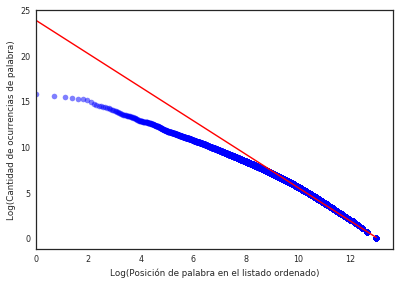

In [34]:
set_style()
fig = plt.Figure(figsize = (4,4), facecolor = 'w', edgecolor = 'w')
ax = plt.subplot(111)

ax.plot(x, y, 'bo', alpha = 0.5)
ax.plot(x,fitted,'r')
ax.set_xlabel(u'Log(Posición de palabra en el listado ordenado)')
ax.set_ylabel(u'Log(Cantidad de ocurrencias de palabra)')
ax.set_xlim(left = max([min(np.log(df['Rank'])) * 0.95,0]))
# for i, txt in enumerate(df.iloc[:10].index,):
#     ax.annotate(txt, (x[i],y[i]))
# ax.get_figure().savefig("{0}zipf{1}{2}.pdf".format(relativePathImages,path,pathFiltro),dpi=300)
# plt.tight_layout()
plt.show()


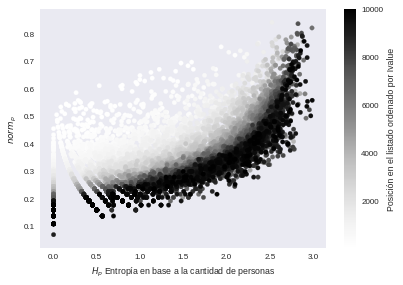

In [54]:
ax = df.iloc[:10000].plot(kind='scatter',x='entropy_personas',y='normCantPersonas',c='rankPalabras_Personas',sharex=False)
ax.set_xlabel(u'$H_p$ Entropía en base a la cantidad de personas')
ax.set_ylabel(r'$norm_p$')
ax.get_figure().get_axes()[1].set_ylabel(u'Posición en el listado ordenado por Ivalue')
ax.get_figure().savefig("{0}entropiaPersonasxNormCantPersonas{1}{2}.pdf".format(relativePathImages,path,pathFiltro),dpi=300)


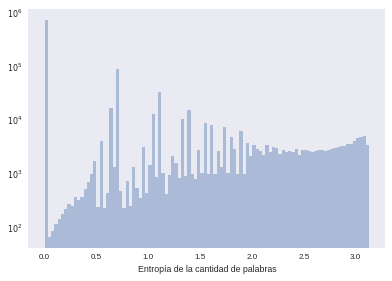

In [65]:
ax = sns.distplot(a=df.entropy_palabras,hist=True,kde=False,axlabel=u'Entropía de la cantidad de palabras',bins=100)
ax.set_yscale('log')
ax2= ax.get_figure()
ax2.savefig("{0}DistribucionEntropia{1}{2}.pdf".format(relativePathImages,path,pathFiltro),dpi=300)

Se puede ver que la entropía en base a la cantidad de las palabras en las distintas regiones, por lo general es menor o igual que la entropía de personas. Esto refleja que las personas que utilizan un término suelen estar distribuidas de manera más uniforme en una región que la cantidad de ocurrencias de las palabras.

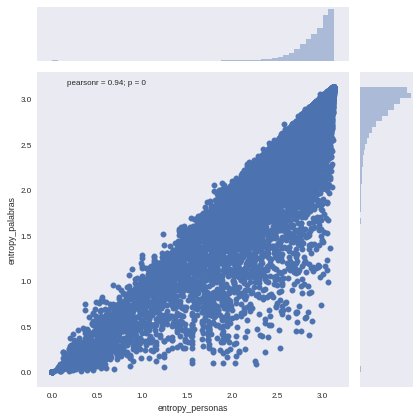

In [190]:
sns.set_style(style='dark')
sns.jointplot(y=df.entropy_palabras,x=df.entropy_personas)

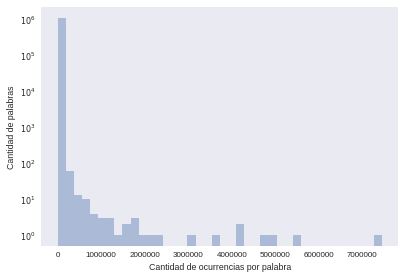

In [66]:
ax = sns.distplot(a=df.cantPalabra,hist=True,bins=40,kde=False)
ax.set_yscale('log')
ax.set_xlabel('Cantidad de ocurrencias por palabra')
ax.set_ylabel('Cantidad de palabras')
ax2 = ax.get_figure()
ax2.savefig("{0}DistribucionOcurrenciasPalabras{1}{2}.pdf".format(relativePathImages,path,pathFiltro),dpi=300)

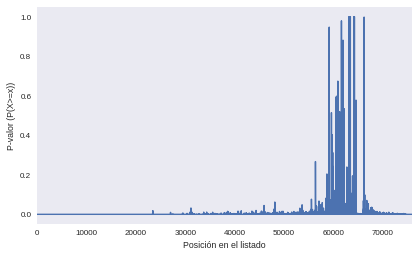

In [37]:
pvalores = pd.read_csv('../pvalores.csv')
f = pvalores.dropna().pvalor.plot(figsize=(4*1.68,4))
f.set_xlabel(u'Posición en el listado')
f.set_ylabel(u'P-valor (P(X>=x))')

f.get_figure().savefig('pvalores.png')

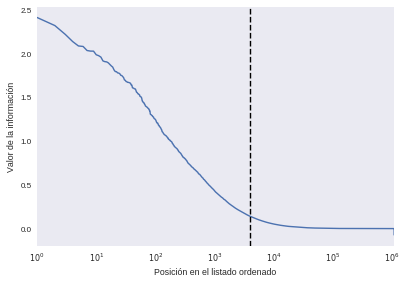

In [67]:
ax=df.plot(x='rankPalabras_Personas',y='information_value_personas_palabras',logx=True,legend=False)
ax.axvline(4000, linestyle='--', color='k')
ax.set_xlabel(u'Posición en el listado ordenado')
ax.set_ylabel(u'Valor de la información')
ax.get_figure().savefig("{0}valorInformacionCorte{1}{2}".format(relativePathImages,path,pathFiltro),dpi=300)

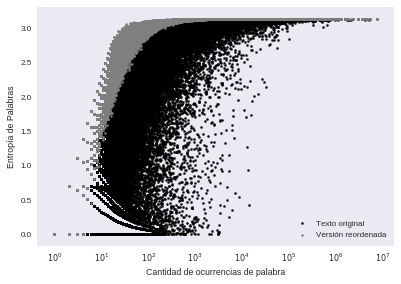

In [68]:

df2 = pd.DataFrame()
df2['x'] = df.cantPalabra
df2['y'] = df.entropy_palabras
ax = df2.plot(kind='scatter',x='x',y='y',s=5,color='black',logx=True,label=u'Texto original')

df3 = pd.DataFrame()
df3['x'] = df.cantPalabra
df3['y'] = df.shuffled_entropy_palabras
df3.plot(kind='scatter',x='x',y='y',s=5,color='gray',logx=True,ax= ax,label=u'Versión reordenada')
ax.set_xlabel(u'Cantidad de ocurrencias de palabra')
ax.set_ylabel(u'Entropía de Palabras')
ax.legend()
ax.get_figure().savefig("{0}entropiaYversionShuffleada{1}{2}".format(relativePathImages,path,pathFiltro),dpi=300)


In [3]:
# from apps import argentina
# import csv
# from nltk.tokenize import TweetTokenizer
# provincias = argentina.keys()
# frames = []
# tknzr = TweetTokenizer(preserve_case=False,reduce_len=True, strip_handles=True)
# parse_dates = ['tweet_created_at', 'created_at']
# cols = ['tweet_created_at','created_at','user_id','text']
# for p in provincias:
#     print(p)
#     dfT = pd.read_csv('../csv/train_{0}.csv'.format(p),usecols=cols,encoding='utf-8',delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL, parse_dates=parse_dates)
#     dfT.fillna('',inplace=True)
#     dfT['cantPalabras'] = dfT.text.apply(lambda x: len([w for w in tknzr.tokenize(x.lower()) if w.isalpha()])) 
#     dfT = dfT.drop('text', 1)
#     frames.append(dfT)
# arg = pd.concat(frames,keys = provincias,names=['provincias','nro'])
# arg.to_csv('../contrastes/argTiemposYCant.csv')

jujuy
catamarca
sanjuan
salta
rionegro
lapampa
chaco
mendoza
buenosaires
entrerios
chubut
santacruz
neuquen
misiones
corrientes
formosa
santafe
santiago
cordoba
larioja
tierradelfuego
tucuman
sanluis


In [ ]:
arg = pd.read_csv('../contrastes/argTiemposYCant.csv')

In [32]:
arg.cantPalabras.sum(level='provincias')

provincias
jujuy              5951777
catamarca          8161308
sanjuan            8377791
salta              7506651
rionegro           9991830
lapampa            8996317
chaco              7605990
mendoza            9402398
buenosaires        8974371
entrerios          9462985
chubut             8884744
santacruz          7432922
neuquen            9021448
misiones           7790196
corrientes         8426939
formosa            7184381
santafe            8862327
santiago           7355728
cordoba           10075931
larioja            6757276
tierradelfuego     8559217
tucuman            9238525
sanluis            8327092
Name: cantPalabras, dtype: int64

### Veo cuantas palabras hay por usuario

In [19]:
arg.groupby('user_id').cantPalabras.sum().describe()

count    21645.000000
mean      8886.493139
std       6768.412591
min          0.000000
25%       3378.000000
50%       7796.000000
75%      12993.000000
max      49608.000000
Name: cantPalabras, dtype: float64

In [21]:
times = pd.DataFrame()
for prov in provincias:
    dfT = pd.read_csv('../csv/train_{0}.csv'.format(prov),usecols=['tweet_created_at'],encoding='utf-8',delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL,parse_dates=['tweet_created_at'])
    times[prov] = dfT.tweet_created_at

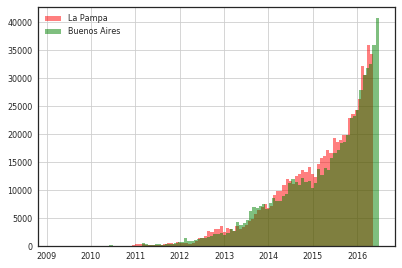

In [22]:
ax = times.lapampa.hist(bins=100,alpha=0.5,color='red',label = 'La Pampa',stacked=True)
times.cordoba.hist(bins=100,ax=ax,color='green',alpha=0.5,label='Buenos Aires',stacked=True)
# times.tierradelfuego.hist(bins=100,ax=ax,color='blue',alpha=0.3,label='Cordoba',stacked=True)
ax.legend()
ax.get_figure().savefig("{0}histTweetsProvincia1.pdf".format(relativePathImages),dpi=300)


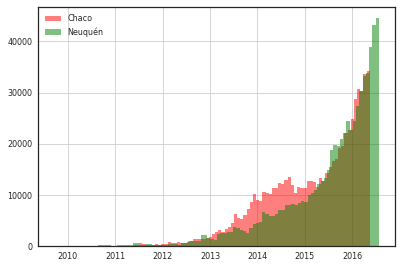

In [23]:
ax = times.chaco.hist(bins=100,alpha=0.5,color='red',label = 'Chaco')
times.neuquen.hist(bins=100,ax=ax,color='green',alpha=0.5,label=u'Neuquén')
# times.tierradelfuego.hist(bins=100,ax=ax,color='blue',alpha=0.3,label='Cordoba',stacked=True)
ax.legend()
ax.get_figure().savefig("{0}histTweetsProvincia2.pdf".format(relativePathImages),dpi=300)


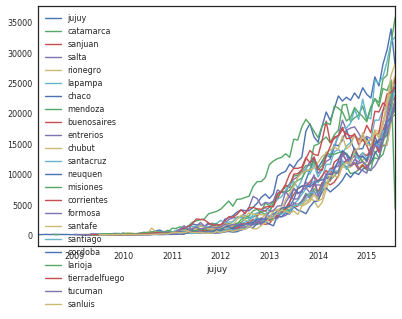

In [34]:
times2 = pd.DataFrame()
for p in provincias:
    times2[p] = times[p].groupby(times[p].dt.to_period('M')).count()

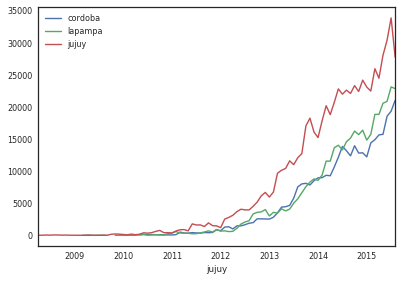

In [36]:
times2[['cordoba','lapampa','jujuy']].plot()

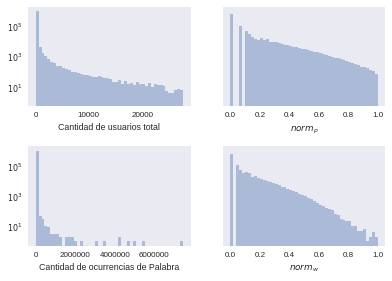

In [69]:
sns.set_context('paper')
fig, axes = plt.subplots(ncols=2,nrows=2,sharey=True)
sns.distplot(df.cantUsuariosTotal,kde=False,ax=axes[0,0])
sns.distplot(df.normCantPersonas,kde=False,ax=axes[0,1])
sns.distplot(a=df.cantPalabra,kde=False,ax=axes[1,0])
sns.distplot(df.normCantPalabras,kde=False,ax=axes[1,1])
fig.subplots_adjust(hspace=.4)
# axes[0,0].set(xlabel='Cantidad de ocurrencias', ylabel='')
replacements = {'cantUsuariosTotal': 'Cantidad de usuarios total', 'normCantPersonas': r'$norm_p$',
                'cantPalabra': 'Cantidad de ocurrencias de Palabra', 'normCantPalabras': r'$norm_w$'}

# axes[0,0].set_xlim(0,4000)
# axes[1,0].set_xlim(0,200000)
axes[0,0].set_yscale('log')

axes[1,0].set_yscale('log')

for i in range(2):
    for j in range(2):
        xlabel = axes[i][j].get_xlabel()
        ylabel = axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            axes[i][j].set_ylabel(replacements[ylabel])
fig.savefig("{0}cantNorms{1}{2}.pdf".format(relativePathImages,path,pathFiltro),dpi=300)

In [40]:
df3 =pd.read_csv('ivalue_entropia_personas_palabras{0}{1}.csv'.format(path,pathFiltro),index_col=0)

In [42]:
df3.iloc[:10000][df3.iloc[:10000].cantPalabra < 40].cantPalabra.describe()

count    5060.000000
mean       20.098419
std         8.993606
min         6.000000
25%        12.000000
50%        19.000000
75%        27.000000
max        39.000000
Name: cantPalabra, dtype: float64